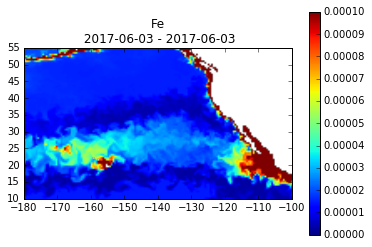

In [10]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def plot(lat, lon, data):
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', vmin=0, vmax=1e-4)
    plt.title(field + '\n ' + dt1 + ' - ' + dt2)
    plt.colorbar()
    plt.show()


def prepareQuery(args):
    query = "SELECT [time], lat, lon, depth, %s FROM %s WHERE "
    query = query + "[time]>='%s' AND [time]<='%s' AND "
    query = query + "lat>=%f AND lat<=%f AND "
    query = query + "lon>=%f AND lon<=%f AND "
    query = query + "depth>=%f AND depth<=%f "
    query = query + "ORDER BY [time], lat, lon, depth "
    query = query % args
    return query


############## set parameters ################
table = 'tblPisces_NRT'
field = 'Fe'    # Mole concentration of dissolved Iron 
dt1 = '2017-06-03'
dt2 = '2017-06-03'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
depth1 = 0
depth2 = 1
##############################################
args = (field, table, dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2)
query = prepareQuery(args)
df = db.dbFetch(query)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', 'depth', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
#df.to_csv(field+'.csv', index=False)    # export data if needed!
plot(lat, lon, data)


Below is the exact values for the model's depth levels (m):

* 0.494024991989
* 1.54137504101
* 2.64566898346
* 3.81949496269
* 5.07822418213
* 6.44061422348
* 7.92956018448
* 9.5729970932
* 11.404999733
* 13.4671401978
* 15.8100700378
* 18.4955596924
* 21.5988197327
* 25.2114105225
* 29.4447307587
* 34.4341506958
* 40.3440513611
* 47.3736915588
* 55.764289856
* 65.8072662354
* 77.8538513184
* 92.3260726929
* 109.729301453
* 130.666000366
* 155.850692749
* 186.125595093
* 222.475204468
* 266.040313721
* 318.127410889
* 380.213012695
* 453.937713623
* 541.088928223
* 643.566772461
* 763.333129883
* 902.339294434
* 1062.43994141
* 1245.29101562
* 1452.25097656
* 1684.28405762
* 1941.89294434
* 2225.07788086
* 2533.3359375
* 2865.70288086
* 3220.82006836
* 3597.03198242
* 3992.48388672
* 4405.22412109
* 4833.29101562
* 5274.78417969
* 5727.91699219
